###Introduction


This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the <a href="https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook" target="_blank">Cookbook<a/>.

Customarily, we import as follows:

In [85]:
import numpy as np
import pandas as pd

## Object Creation


See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro">Intro to data structures section</a>.

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a> by passing a list of values, letting pandas create a default integer index:

In [86]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a NumPy array, with a datetime index using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.date_range.html#pandas.date_range">`date_range()`</a> and labeled columns:

In [87]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [88]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.531152,-1.350048,-1.447313,0.513204
2013-01-02,0.825363,-0.330099,0.404520,0.228265
2013-01-03,0.110440,-1.730319,1.072198,-1.738788
2013-01-04,1.498977,-0.497302,-0.551293,-0.430271
2013-01-05,0.104754,-2.163374,-0.449383,-0.511455
2013-01-06,-0.543743,-0.627197,0.964470,-0.067997


Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a dictionary of objects that can be converted into a series-like structure:

In [89]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> have different <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes">`dtypes`</a>:

In [90]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

If you’re using an interactive tool with automatic completion for column names, here’s a subset of the attributes that will be completed:
```
df2.<TAB>
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.columns
df2.align              df2.copy
df2.all                df2.count
df2.any                df2.combine
df2.append             df2.D
df2.apply              df2.describe
df2.applymap           df2.diff
df2.B                  df2.duplicated
```
As you can see, the columns `A`, `B`, `C`, and `D` are automatically tab completed. `E` and `F` are there as well; the rest of the attributes have been truncated for brevity.



## Viewing data

See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics">Basics section</a>.

Use <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head">`DataFrame.head()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail">`DataFrame.tail()`</a> to view the top and bottom rows of the frame respectively:

In [91]:
df.head()

,A,B,C,D
2013-01-01,-0.531152,-1.350048,-1.447313,0.513204
2013-01-02,0.825363,-0.330099,0.404520,0.228265
2013-01-03,0.110440,-1.730319,1.072198,-1.738788
2013-01-04,1.498977,-0.497302,-0.551293,-0.430271
2013-01-05,0.104754,-2.163374,-0.449383,-0.511455


In [92]:
df.tail(3)

,A,B,C,D
2013-01-04,1.498977,-0.497302,-0.551293,-0.430271
2013-01-05,0.104754,-2.163374,-0.449383,-0.511455
2013-01-06,-0.543743,-0.627197,0.964470,-0.067997


Display the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html#pandas.DataFrame.index">`DataFrame.index`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns">`DataFrame.columns`</a>:

In [93]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [94]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: **NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column**. When you call <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a>, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being `object`, which requires casting every value to a Python object.

For `df`, our <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> of all floating-point values, and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is fast and doesn’t require copying data:

In [95]:
df.to_numpy()

array([[-0.53115162, -1.35004815, -1.44731346,  0.51320395],
       [ 0.82536298, -0.33009897,  0.40451982,  0.22826538],
       [ 0.11044022, -1.73031884,  1.07219808, -1.73878758],
       [ 1.49897733, -0.49730172, -0.55129316, -0.43027104],
       [ 0.10475374, -2.16337449, -0.44938345, -0.51145459],
       [-0.5437429 , -0.62719747,  0.96447034, -0.06799688]])

For `df2`, the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> with multiple dtypes, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is relatively expensive:



In [96]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

NOTE: <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> does not include the index or column labels in the output.

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe">`describe()`</a> shows a quick statistic summary of your data:

In [97]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.244107,-1.116390,-0.001134,-0.334507
std,0.796439,0.744112,0.984279,0.789790
min,-0.543743,-2.163374,-1.447313,-1.738788
25%,-0.372175,-1.635251,-0.525816,-0.491159
50%,0.107597,-0.988623,-0.022432,-0.249134
75%,0.646632,-0.529776,0.824483,0.154200
max,1.498977,-0.330099,1.072198,0.513204


Transposing your data:

In [98]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.531152,0.825363,0.110440,1.498977,0.104754,-0.543743
B,-1.350048,-0.330099,-1.730319,-0.497302,-2.163374,-0.627197
C,-1.447313,0.404520,1.072198,-0.551293,-0.449383,0.964470
D,0.513204,0.228265,-1.738788,-0.430271,-0.511455,-0.067997


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html#pandas.DataFrame.sort_index">`DataFrame.sort_index()`</a> sorts by an axis:

In [99]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.513204,-1.447313,-1.350048,-0.531152
2013-01-02,0.228265,0.404520,-0.330099,0.825363
2013-01-03,-1.738788,1.072198,-1.730319,0.110440
2013-01-04,-0.430271,-0.551293,-0.497302,1.498977
2013-01-05,-0.511455,-0.449383,-2.163374,0.104754
2013-01-06,-0.067997,0.964470,-0.627197,-0.543743


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values">`DataFrame.sort_values()`</a> sorts by values:

In [100]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,0.104754,-2.163374,-0.449383,-0.511455
2013-01-03,0.110440,-1.730319,1.072198,-1.738788
2013-01-01,-0.531152,-1.350048,-1.447313,0.513204
2013-01-06,-0.543743,-0.627197,0.964470,-0.067997
2013-01-04,1.498977,-0.497302,-0.551293,-0.430271
2013-01-02,0.825363,-0.330099,0.404520,0.228265


## Selection

NOTE: While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat">`DataFrame.iat()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a>.

See the indexing documentation <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing">Indexing and Selecting Data</a> and <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/advanced.html#advanced">MultiIndex / Advanced Indexing</a>.



### Getting

Selecting a single column, which yields a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a>, equivalent to `df.A`:

In [101]:
df["A"]

2013-01-01   -0.531152
2013-01-02    0.825363
2013-01-03    0.110440
2013-01-04    1.498977
2013-01-05    0.104754
2013-01-06   -0.543743
Freq: D, Name: A, dtype: float64

Selecting via `[]` (`__getitem__`), which slices the rows:

In [102]:
df[0:3]

,A,B,C,D
2013-01-01,-0.531152,-1.350048,-1.447313,0.513204
2013-01-02,0.825363,-0.330099,0.404520,0.228265
2013-01-03,0.110440,-1.730319,1.072198,-1.738788


In [103]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.825363,-0.330099,0.404520,0.228265
2013-01-03,0.110440,-1.730319,1.072198,-1.738788
2013-01-04,1.498977,-0.497302,-0.551293,-0.430271


### Selection by label

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label">Selection by Label</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

For getting a cross section using a label:

In [104]:
df.loc[dates[0]]

A   -0.531152
B   -1.350048
C   -1.447313
D    0.513204
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [105]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.531152,-1.350048
2013-01-02,0.825363,-0.330099
2013-01-03,0.110440,-1.730319
2013-01-04,1.498977,-0.497302
2013-01-05,0.104754,-2.163374
2013-01-06,-0.543743,-0.627197


Showing label slicing, both endpoints are included:

In [106]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.825363,-0.330099
2013-01-03,0.110440,-1.730319
2013-01-04,1.498977,-0.497302


Reduction in the dimensions of the returned object:

In [107]:
df.loc["20130102", ["A", "B"]]

A    0.825363
B   -0.330099
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [108]:
df.loc[dates[0], "A"]

np.float64(-0.5311516165772195)

For getting fast access to a scalar (equivalent to the prior method):

In [109]:
df.at[dates[0], "A"]

np.float64(-0.5311516165772195)

### Selection by position

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer">Selection by Position</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

Select via the position of the passed integers:

In [110]:
df.iloc[3]

A    1.498977
B   -0.497302
C   -0.551293
D   -0.430271
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to NumPy/Python:

In [111]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.498977,-0.497302
2013-01-05,0.104754,-2.163374


By lists of integer position locations, similar to the NumPy/Python style:

In [112]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.825363,0.404520
2013-01-03,0.110440,1.072198
2013-01-05,0.104754,-0.449383


For slicing rows explicitly:

In [113]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.825363,-0.330099,0.404520,0.228265
2013-01-03,0.110440,-1.730319,1.072198,-1.738788


For slicing columns explicitly:

In [114]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.350048,-1.447313
2013-01-02,-0.330099,0.404520
2013-01-03,-1.730319,1.072198
2013-01-04,-0.497302,-0.551293
2013-01-05,-2.163374,-0.449383
2013-01-06,-0.627197,0.964470


For getting a value explicitly:

In [115]:
df.iloc[1, 1]

np.float64(-0.3300989695380567)

For getting fast access to a scalar (equivalent to the prior method):

In [116]:
df.iat[1, 1]

np.float64(-0.3300989695380567)

### Boolean indexing

Using a single column’s values to select data:

In [117]:
df[df["A"] > 0]

,A,B,C,D
2013-01-02,0.825363,-0.330099,0.404520,0.228265
2013-01-03,0.110440,-1.730319,1.072198,-1.738788
2013-01-04,1.498977,-0.497302,-0.551293,-0.430271
2013-01-05,0.104754,-2.163374,-0.449383,-0.511455


Selecting values from a DataFrame where a boolean condition is met:

In [118]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.513204
2013-01-02,0.825363,NaN,0.404520,0.228265
2013-01-03,0.110440,NaN,1.072198,NaN
2013-01-04,1.498977,NaN,NaN,NaN
2013-01-05,0.104754,NaN,NaN,NaN
2013-01-06,NaN,NaN,0.964470,NaN


Using the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin">`isin()`</a> method for filtering:

In [119]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.531152,-1.350048,-1.447313,0.513204,one
2013-01-02,0.825363,-0.330099,0.404520,0.228265,one
2013-01-03,0.110440,-1.730319,1.072198,-1.738788,two
2013-01-04,1.498977,-0.497302,-0.551293,-0.430271,three
2013-01-05,0.104754,-2.163374,-0.449383,-0.511455,four
2013-01-06,-0.543743,-0.627197,0.964470,-0.067997,three


In [120]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.110440,-1.730319,1.072198,-1.738788,two
2013-01-05,0.104754,-2.163374,-0.449383,-0.511455,four


### Setting

Setting a new column automatically aligns the data by the indexes:

In [121]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [122]:
df["F"] = s1

Setting values by label:

In [123]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [124]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [125]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations:

In [126]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.447313,5.0,NaN
2013-01-02,0.825363,-0.330099,0.404520,5.0,1.0
2013-01-03,0.110440,-1.730319,1.072198,5.0,2.0
2013-01-04,1.498977,-0.497302,-0.551293,5.0,3.0
2013-01-05,0.104754,-2.163374,-0.449383,5.0,4.0
2013-01-06,-0.543743,-0.627197,0.964470,5.0,5.0


A `where` operation with setting:

In [127]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.447313,-5.0,NaN
2013-01-02,-0.825363,-0.330099,-0.404520,-5.0,-1.0
2013-01-03,-0.110440,-1.730319,-1.072198,-5.0,-2.0
2013-01-04,-1.498977,-0.497302,-0.551293,-5.0,-3.0
2013-01-05,-0.104754,-2.163374,-0.449383,-5.0,-4.0
2013-01-06,-0.543743,-0.627197,-0.964470,-5.0,-5.0


## Missing data

pandas primarily uses the `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data) section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [128]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.447313,5.0,NaN,1.0
2013-01-02,0.825363,-0.330099,0.404520,5.0,1.0,1.0
2013-01-03,0.110440,-1.730319,1.072198,5.0,2.0,NaN
2013-01-04,1.498977,-0.497302,-0.551293,5.0,3.0,NaN


[`DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) drops any rows that have missing data:



In [129]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.825363,-0.330099,0.40452,5.0,1.0,1.0


[`DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) fills missing data:

In [130]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.447313,5.0,5.0,1.0
2013-01-02,0.825363,-0.330099,0.404520,5.0,1.0,1.0
2013-01-03,0.110440,-1.730319,1.072198,5.0,2.0,5.0
2013-01-04,1.498977,-0.497302,-0.551293,5.0,3.0,5.0


[`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna) gets the boolean mask where values are `nan`:

In [131]:
pd.isna(df)

,A,B,C,D,F
2013-01-01,False,False,False,False,True
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False
2013-01-05,False,False,False,False,False
2013-01-06,False,False,False,False,False


## Operations

See the [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### Stats

Operations in general *exclude* missing data.

Performing a descriptive statistic:


In [132]:
df.mean()

A    0.332632
B   -0.891382
C   -0.001134
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [133]:
df.mean(1)

2013-01-01    0.888172
2013-01-02    1.379957
2013-01-03    1.290464
2013-01-04    1.690076
2013-01-05    1.298399
2013-01-06    1.958706
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically
broadcasts along the specified dimension

In [134]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [135]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.889560,-2.730319,0.072198,4.0,1.0
2013-01-04,-1.501023,-3.497302,-3.551293,2.0,0.0
2013-01-05,-4.895246,-7.163374,-5.449383,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

[`DataFrame.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) applies a user defined function to the data:

In [136]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.447313,5.0,NaN
2013-01-02,0.825363,-0.330099,-1.042794,10.0,1.0
2013-01-03,0.935803,-2.060418,0.029404,15.0,3.0
2013-01-04,2.434781,-2.557720,-0.521889,20.0,6.0
2013-01-05,2.539534,-4.721094,-0.971272,25.0,10.0
2013-01-06,1.995791,-5.348291,-0.006802,30.0,15.0


In [137]:
df.apply(lambda x: x.max() - x.min())

A    2.042720
B    2.163374
C    2.519512
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization).

In [138]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    2
2    4
3    3
4    1
5    1
6    0
7    4
8    6
9    6
dtype: int64

In [139]:
s.value_counts()

2    2
4    2
1    2
6    2
3    1
0    1
Name: count, dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods).

In [140]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging).

Concatenating pandas objects together along an axis with [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat):

In [141]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.196436,0.596015,1.727762,0.762697
1,1.179851,0.254543,0.085402,0.469753
2,3.218138,0.197933,-0.476619,-0.698078
3,0.914033,-1.013028,0.947445,0.419966
4,0.736053,-0.086107,-0.514438,0.959810
5,-0.535362,1.373689,-0.431096,1.469508
6,-1.034973,-2.328394,0.645593,0.415640
7,0.532984,0.703115,-0.357582,0.411883
8,-1.100855,0.315011,-0.053664,-0.717552
9,1.044034,0.678966,0.068023,0.524698


In [142]:
# break it onto pieces
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,0.196436,0.596015,1.727762,0.762697
1,1.179851,0.254543,0.085402,0.469753
2,3.218138,0.197933,-0.476619,-0.698078
3,0.914033,-1.013028,0.947445,0.419966
4,0.736053,-0.086107,-0.514438,0.959810
5,-0.535362,1.373689,-0.431096,1.469508
6,-1.034973,-2.328394,0.645593,0.415640
7,0.532984,0.703115,-0.357582,0.411883
8,-1.100855,0.315011,-0.053664,-0.717552
9,1.044034,0.678966,0.068023,0.524698


NOTE: Adding a column to a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) constructor instead of building a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by iteratively appending records to it.

### Join

[`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge) enables SQL style join types along specific columns. See the [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join) section.

In [143]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Adding a column to a `DataFrame` is relatively fast. However adding a row requires a copy, and may be expensive. It is recorecommended passing a pre-build list of records to the `DataFrame` constructor instead of buildinga `DataFrame` by iteratively appending records to it.

Another example that can be given is:

In [144]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By 'group by' we are referring to a process invloving one or more of the following steps:


*   **Splitting** the data into group base on some criteria
*   **Applying** a function to each group independently

*   **Combining** the results into a data structure

See the [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby).


In [145]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.059739,-0.184115
1,bar,one,1.278024,1.638747
2,foo,two,1.789582,0.848840
3,bar,three,0.599123,-0.269755
4,foo,two,-0.541537,-0.485177
5,bar,two,1.135844,-1.048326
6,foo,one,-0.137451,-0.522533
7,bar,three,1.147925,0.330233


Grouping and then applying the `sum()` funcion to the resulting group:

In [146]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,4.160916,0.650899
foo,1.170333,-0.342985


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function:

In [147]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    1.278024  1.638747
    three  1.747048  0.060478
    two    1.135844 -1.048326
foo one   -0.077712 -0.706648
    two    1.248045  0.363663

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [148]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.757242  0.327272
      two    -0.185320  0.620210
baz   one     1.519386 -1.528688
      two    -1.176617 -0.582235

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [149]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.757242
               B    0.327272
       two     A   -0.185320
               B    0.620210
baz    one     A    1.519386
               B   -1.528688
       two     A   -1.176617
               B   -0.582235
dtype: float64

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [150]:
stacked.unstack()

A         B
first second                    
bar   one     0.757242  0.327272
      two    -0.185320  0.620210
baz   one     1.519386 -1.528688
      two    -1.176617 -0.582235

In [151]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.757242 -0.185320
      B  0.327272  0.620210
baz   A  1.519386 -1.176617
      B -1.528688 -0.582235

In [152]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.757242  1.519386
       B  0.327272 -1.528688
two    A -0.185320 -1.176617
       B  0.620210 -0.582235

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [153]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.233492,0.480122
1,one,B,foo,0.652520,-0.617950
2,two,C,foo,-0.182594,-2.166965
3,three,A,bar,1.790674,1.976457
4,one,B,bar,-1.478552,0.786876
5,one,C,bar,-1.291591,-1.489858
6,two,A,foo,0.368170,-0.086590
7,three,B,foo,-0.685921,-1.414023
8,one,C,foo,1.656132,1.169300
9,one,A,bar,-0.615581,1.467806


[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [154]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.615581  0.233492
      B -1.478552  0.652520
      C -1.291591  1.656132
three A  1.790674       NaN
      B       NaN -0.685921
      C  0.342162       NaN
two   A       NaN  0.368170
      B  0.416854       NaN
      C       NaN -0.182594

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [155]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

/tmp/ipykernel_33924/3822820133.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  rng = pd.date_range("1/1/2012", periods=100, freq="S")


2012-01-01    22660
Freq: 5min, dtype: int64

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [156]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06    0.180412
2012-03-07    0.187246
2012-03-08   -1.428604
2012-03-09   -0.218646
2012-03-10    0.329629
Freq: D, dtype: float64 



2012-03-06 00:00:00+00:00    0.180412
2012-03-07 00:00:00+00:00    0.187246
2012-03-08 00:00:00+00:00   -1.428604
2012-03-09 00:00:00+00:00   -0.218646
2012-03-10 00:00:00+00:00    0.329629
Freq: D, dtype: float64

Converting between time span representations:

In [157]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps

/tmp/ipykernel_33924/100813781.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rng = pd.date_range("1/1/2012", periods=5, freq="M")


2012-01   -1.304909
2012-02   -0.301678
2012-03   -1.641682
2012-04   -0.871376
2012-05    0.325655
Freq: M, dtype: float64

In [158]:
ps.to_timestamp()

2012-01-01   -1.304909
2012-02-01   -0.301678
2012-03-01   -1.641682
2012-04-01   -0.871376
2012-05-01    0.325655
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [159]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

/tmp/ipykernel_33924/1675664520.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9


1990-03-01 09:00   -2.103319
1990-06-01 09:00    1.043148
1990-09-01 09:00    0.303606
1990-12-01 09:00    1.131731
1991-03-01 09:00   -0.772258
Freq: h, dtype: float64

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [160]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [161]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [162]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [163]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [164]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [165]:
df.groupby("grade").size()

/tmp/ipykernel_33924/3951628473.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grade").size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

<Axes: >

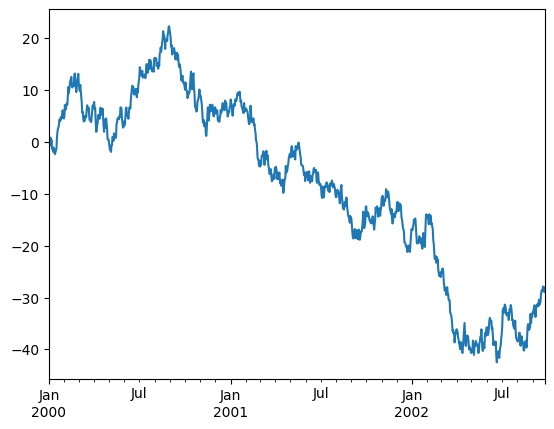

In [166]:
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

<Figure size 640x480 with 0 Axes>

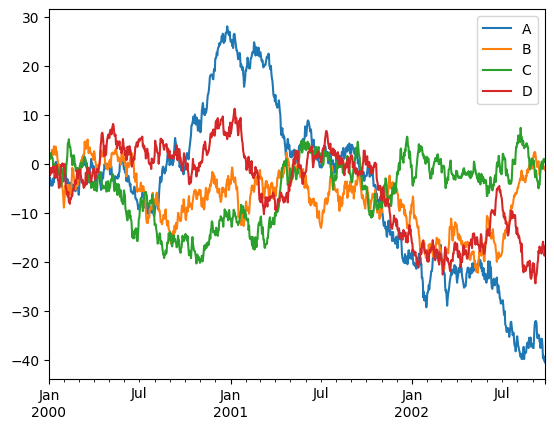

In [167]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [168]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [169]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.890035,1.735100,0.697617,-0.799314
1,2000-01-02,-3.061225,1.689333,2.002476,-2.465143
2,2000-01-03,-2.858241,1.991702,1.910814,-1.448972
3,2000-01-04,-3.219648,1.401724,1.096380,-2.110658
4,2000-01-05,-4.422598,1.788041,2.247570,-0.771202
...,...,...,...,...,...
995,2002-09-22,-39.750642,-0.917864,-0.375402,-15.895117
996,2002-09-23,-39.233969,-0.574791,0.959454,-17.074378
997,2002-09-24,-40.030181,-0.503653,1.066657,-16.826768
998,2002-09-25,-40.358108,-0.940270,0.616130,-18.755390


### HDF5

Reading and writing to [HDFStores](https://pandas.pydata.org/docs/user_guide/io.html#io-hdf5).

Writing to a HDF5 Store using [`DataFrame.to_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html#pandas.DataFrame.to_hdf):

In [171]:
df.to_hdf("foo.h5", "df")

/tmp/ipykernel_33924/992960660.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf("foo.h5", "df")


Reading from a HDF5 Store using [`read_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html#pandas.read_hdf):

In [172]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,-1.890035,1.735100,0.697617,-0.799314
2000-01-02,-3.061225,1.689333,2.002476,-2.465143
2000-01-03,-2.858241,1.991702,1.910814,-1.448972
2000-01-04,-3.219648,1.401724,1.096380,-2.110658
2000-01-05,-4.422598,1.788041,2.247570,-0.771202
...,...,...,...,...
2002-09-22,-39.750642,-0.917864,-0.375402,-15.895117
2002-09-23,-39.233969,-0.574791,0.959454,-17.074378
2002-09-24,-40.030181,-0.503653,1.066657,-16.826768
2002-09-25,-40.358108,-0.940270,0.616130,-18.755390


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [174]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [176]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.890035,1.735100,0.697617,-0.799314
1,2000-01-02,-3.061225,1.689333,2.002476,-2.465143
2,2000-01-03,-2.858241,1.991702,1.910814,-1.448972
3,2000-01-04,-3.219648,1.401724,1.096380,-2.110658
4,2000-01-05,-4.422598,1.788041,2.247570,-0.771202
...,...,...,...,...,...
995,2002-09-22,-39.750642,-0.917864,-0.375402,-15.895117
996,2002-09-23,-39.233969,-0.574791,0.959454,-17.074378
997,2002-09-24,-40.030181,-0.503653,1.066657,-16.826768
998,2002-09-25,-40.358108,-0.940270,0.616130,-18.755390


## Gotchas

If you are attempting to perform a boolean operation on a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) or [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) you might see an exception like:

In [177]:
if pd.Series([False, True, False]):
     print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare) and [Gotchas](https://pandas.pydata.org/docs/user_guide/gotchas.html#gotchas) for an explanation and what to do.